In [1]:
import pandas as pd
import tensorflow as tf
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.display import clear_output

In [8]:
col_list = ['case_month', 'res_state', 'state_fips_code', 'res_county', 'county_fips_code',
           'age_group', 'sex', 'race', 'ethnicity', 'case_positive_specimen_interval', 
           'case_onset_interval', 'process', 'exposure_yn', 'current_status', 'symptom_status',
           'hosp_yn', 'icu_yn','death_yn', 'underlying_conditions_yn']
dtyp = {'case_positive_specimen_interval':np.int64, 'case_onset_interval':np.int64, 'case_month':str, 'res_state':str, 'state_fips_code':str, 'res_county':str, 'county_fips_code':str,
       'age_group':str, 'sex':str, 'race':str, 'ethnicity':str, 'process':str, 'exposure_yn':str, 'current_status':str, 'symptom_status':str,
       'hosp_yn':str,'icu_yn':str, 'death_yn':str,'underlying_conditions_yn':str}
cdc = pd.read_csv('cdc2.csv', names=col_list, dtype=dtyp, header=1, skiprows=1)

In [20]:
cdc.replace?

In [3]:
cdc['death_yn'].replace(to_replace=['No', 'Yes'], value=[0,1], inplace=True)

In [21]:
cdc['death_yn'].unique()

array(['No', 'Yes'], dtype=object)

In [14]:
cdc.dtypes

case_month                         object
res_state                          object
state_fips_code                    object
res_county                         object
county_fips_code                   object
age_group                          object
sex                                object
race                               object
ethnicity                          object
case_positive_specimen_interval     int64
case_onset_interval                 int64
process                            object
exposure_yn                        object
current_status                     object
symptom_status                     object
hosp_yn                            object
icu_yn                             object
death_yn                           object
underlying_conditions_yn           object
dtype: object

In [14]:
cdc.to_csv?

In [15]:
cdc[:80000].to_csv('cdctest.csv')

In [12]:
cdc.head()

,case_month,res_state,state_fips_code,res_county,county_fips_code,age_group,sex,race,ethnicity,case_positive_specimen_interval,case_onset_interval,process,exposure_yn,current_status,symptom_status,hosp_yn,icu_yn,death_yn,underlying_conditions_yn
0,2021-01,NV,32,CLARK,32003,18 to 49 years,Male,Black,Non-Hispanic/Latino,0,0,Multiple,Yes,Laboratory-confirmed case,Symptomatic,No,No,No,Yes
1,2020-04,IA,19,WOODBURY,19193,50 to 64 years,Female,White,Hispanic/Latino,0,0,Clinical evaluation,Yes,Laboratory-confirmed case,Symptomatic,No,No,No,Yes
2,2020-08,KS,20,CRAWFORD,20037,18 to 49 years,Male,White,Non-Hispanic/Latino,0,0,Clinical evaluation,Yes,Probable Case,Symptomatic,No,No,No,No
3,2021-09,OH,39,JEFFERSON,39081,18 to 49 years,Female,White,Non-Hispanic/Latino,0,0,Clinical evaluation,Yes,Laboratory-confirmed case,Symptomatic,No,No,No,Yes
4,2020-04,IA,19,WOODBURY,19193,50 to 64 years,Female,White,Hispanic/Latino,2,0,Clinical evaluation,Yes,Laboratory-confirmed case,Symptomatic,No,No,No,Yes


In [6]:
cdc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80000 entries, 0 to 79999
Data columns (total 19 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   case_month                       80000 non-null  object 
 1   res_state                        80000 non-null  object 
 2   state_fips_code                  80000 non-null  float64
 3   res_county                       79750 non-null  object 
 4   county_fips_code                 79750 non-null  float64
 5   age_group                        77517 non-null  object 
 6   sex                              72346 non-null  object 
 7   race                             61087 non-null  object 
 8   ethnicity                        57755 non-null  object 
 9   case_positive_specimen_interval  31439 non-null  float64
 10  case_onset_interval              41777 non-null  float64
 11  process                          80000 non-null  object 
 12  exposure_yn       

In [19]:
for i in cdc:
    print(cdc[i].unique())

['2021-01' '2020-04' '2020-08' '2021-09' '2020-09' '2020-11' '2021-08'
 '2020-10' '2021-04' '2020-05' '2021-12' '2021-03' '2021-11' '2021-10'
 '2020-07' '2020-12' '2021-06' '2021-07' '2021-02' '2020-06' '2020-03'
 '2021-05']
['NV' 'IA' 'KS' 'OH' 'UT' 'KY' 'VT' 'ID' 'CO' 'LA' 'AK' 'MN' 'NY' 'FL'
 'NC']
['32' '19' '20' '39' '49' '21' '50' '16' '8' '22' '2' '27' '36' '12' '37']
['CLARK' 'WOODBURY' 'CRAWFORD' 'JEFFERSON' 'DOUGLAS' 'FORD' 'MONTGOMERY'
 'POTTAWATTAMIE' 'MERCER' 'SEWARD' 'CACHE' 'SANPETE' 'FAYETTE' 'MCPHERSON'
 'UINTAH' 'WASHINGTON' 'ELKO' 'WARREN' 'SENECA' 'HAMILTON' 'WEBSTER'
 'HURON' 'BUTLER' 'RILEY' 'LEAVENWORTH' 'TRUMBULL' 'WOOD' 'HENRY'
 'CALLOWAY' 'DEFIANCE' 'PIKE' 'PLYMOUTH' 'JACKSON' 'MADISON' 'PULASKI'
 'ROSS' 'WAYNE' 'MARSHALL' 'FAIRFIELD' 'DELAWARE' 'WYANDOT' 'ADAMS'
 'BARTON' 'POTTAWATOMIE' 'TAYLOR' 'BOYD' 'PERRY' 'VAN WERT' 'COSHOCTON'
 'WASHOE' 'SEVIER' 'BELL' 'DAVIS' 'HOPKINS' 'STARK' 'SEDGWICK' 'LUCAS'
 'OTTAWA' 'NELSON' 'FULTON' 'MIAMI' 'LYON' 'JESSAMINE' 'F

In [5]:
cdc.pop('Unnamed: 0')

0            0
1            1
2            2
3            3
4            4
         ...  
79995    79995
79996    79996
79997    79997
79998    79998
79999    79999
Name: Unnamed: 0, Length: 80000, dtype: int64

In [8]:
cdc.isna().sum()

case_month                             0
res_state                              0
state_fips_code                        0
res_county                           250
county_fips_code                     250
age_group                           2483
sex                                 7654
race                               18913
ethnicity                          22245
case_positive_specimen_interval    48561
case_onset_interval                38223
process                                0
exposure_yn                            0
current_status                         0
symptom_status                         0
hosp_yn                                0
icu_yn                                 0
death_yn                            8183
underlying_conditions_yn           73994
dtype: int64

In [15]:
cdc['death_yn'].value_counts()

No     79641
Yes     1273
Name: death_yn, dtype: int64

In [49]:
cdc.drop(columns=['case_positive_specimen_interval', 'case_onset_interval'],inplace=True)

In [9]:
cdc.drop(columns=['age_group'],inplace=True)

In [9]:
cdc

,case_month,res_state,state_fips_code,res_county,county_fips_code,age_group,sex,race,ethnicity,case_positive_specimen_interval,case_onset_interval,process,exposure_yn,current_status,symptom_status,hosp_yn,icu_yn,death_yn,underlying_conditions_yn
1,2020-12,AR,5.0,POINSETT,5111.0,0 - 17 years,Female,White,Non-Hispanic/Latino,0.0,0.0,Missing,Missing,Laboratory-confirmed case,Symptomatic,No,Missing,No,Yes
4,2020-11,KS,20.0,FORD,20057.0,18 to 49 years,Male,White,Hispanic/Latino,0.0,0.0,Missing,Yes,Laboratory-confirmed case,Symptomatic,No,No,No,No
5,2020-12,AR,5.0,CLARK,5019.0,18 to 49 years,Female,Black,Non-Hispanic/Latino,0.0,0.0,Missing,Missing,Laboratory-confirmed case,Symptomatic,No,Missing,No,Yes
6,2021-08,OH,39.0,MONTGOMERY,39113.0,18 to 49 years,Male,Black,Non-Hispanic/Latino,0.0,0.0,Clinical evaluation,Yes,Laboratory-confirmed case,Symptomatic,No,Missing,No,Yes
7,2020-04,NY,36.0,WASHINGTON,36115.0,65+ years,Female,White,Non-Hispanic/Latino,23.0,0.0,Missing,Yes,Laboratory-confirmed case,Symptomatic,Missing,No,No,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1051949,2020-05,KS,20.0,SEWARD,20175.0,18 to 49 years,Male,White,Hispanic/Latino,1.0,0.0,Clinical evaluation,Unknown,Laboratory-confirmed case,Symptomatic,Unknown,No,No,Yes
1051951,2021-05,PA,42.0,LEHIGH,42077.0,18 to 49 years,Male,White,Hispanic/Latino,0.0,0.0,Missing,Yes,Laboratory-confirmed case,Symptomatic,No,No,No,Yes
1051952,2020-12,AR,5.0,BAXTER,5005.0,65+ years,Female,White,Non-Hispanic/Latino,1.0,0.0,Missing,Missing,Laboratory-confirmed case,Symptomatic,No,Missing,No,Yes
1051953,2020-11,KY,21.0,OHIO,21183.0,65+ years,Female,White,Non-Hispanic/Latino,0.0,0.0,Missing,Yes,Laboratory-confirmed case,Symptomatic,No,Missing,No,Yes


In [4]:
# test = cdc.loc[-1:250000].dropna()
# test = test.drop(test[test['icu_yn']=='nul'].index)
# train = cdc.loc[250000:].dropna()
# train = train.drop(train[train['icu_yn']=='nul'].index)
train = cdc[:75000]
test = cdc[75000:]
y_train = train.pop('death_yn')
y_test = test.pop('death_yn')
cdc.pop('death_yn')
# train.reset_index()
# test.reset_index()

train

,case_month,res_state,state_fips_code,res_county,county_fips_code,age_group,sex,race,ethnicity,case_positive_specimen_interval,case_onset_interval,process,exposure_yn,current_status,symptom_status,hosp_yn,icu_yn,underlying_conditions_yn
0,2021-01,NV,32,CLARK,32003,18 to 49 years,Male,Black,Non-Hispanic/Latino,0,0,Multiple,Yes,Laboratory-confirmed case,Symptomatic,No,No,Yes
1,2020-04,IA,19,WOODBURY,19193,50 to 64 years,Female,White,Hispanic/Latino,0,0,Clinical evaluation,Yes,Laboratory-confirmed case,Symptomatic,No,No,Yes
2,2020-08,KS,20,CRAWFORD,20037,18 to 49 years,Male,White,Non-Hispanic/Latino,0,0,Clinical evaluation,Yes,Probable Case,Symptomatic,No,No,No
3,2021-09,OH,39,JEFFERSON,39081,18 to 49 years,Female,White,Non-Hispanic/Latino,0,0,Clinical evaluation,Yes,Laboratory-confirmed case,Symptomatic,No,No,Yes
4,2020-04,IA,19,WOODBURY,19193,50 to 64 years,Female,White,Hispanic/Latino,2,0,Clinical evaluation,Yes,Laboratory-confirmed case,Symptomatic,No,No,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74995,2020-07,NV,32,CLARK,32003,18 to 49 years,Female,White,Non-Hispanic/Latino,1,0,Routine surveillance,Yes,Laboratory-confirmed case,Symptomatic,No,No,Yes
74996,2020-07,NV,32,CLARK,32003,18 to 49 years,Female,White,Non-Hispanic/Latino,1,0,Multiple,Yes,Laboratory-confirmed case,Symptomatic,No,No,Yes
74997,2020-07,NV,32,CLARK,32003,18 to 49 years,Female,White,Non-Hispanic/Latino,0,0,Routine surveillance,Yes,Laboratory-confirmed case,Symptomatic,No,No,Yes
74998,2020-07,NV,32,CLARK,32003,18 to 49 years,Female,White,Non-Hispanic/Latino,0,0,Routine surveillance,Yes,Laboratory-confirmed case,Symptomatic,No,No,Yes


In [20]:
cdc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80915 entries, 0 to 80914
Data columns (total 19 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   case_month                       80915 non-null  object 
 1   res_state                        80915 non-null  object 
 2   state_fips_code                  80915 non-null  float64
 3   res_county                       80915 non-null  object 
 4   county_fips_code                 80915 non-null  float64
 5   age_group                        80915 non-null  object 
 6   sex                              80915 non-null  object 
 7   race                             80915 non-null  object 
 8   ethnicity                        80915 non-null  object 
 9   case_positive_specimen_interval  80915 non-null  float64
 10  case_onset_interval              80915 non-null  float64
 11  process                          80915 non-null  object 
 12  exposure_yn       

In [13]:
cdc = cdc.astype({'state_fips_code':str, 'county_fips_code':str})

In [54]:
missing_percentages = (cdc.isna().sum().sort_values(ascending = False) / len(cdc) * 100)
filtered_missing_percentages = missing_percentages[missing_percentages != 0]
filtered_missing_percentages

Series([], dtype: float64)

In [19]:
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']

newcdc = cdc.select_dtypes(include=numerics)

In [21]:
newcdc.columns

Index(['state_fips_code', 'county_fips_code',
       'case_positive_specimen_interval', 'case_onset_interval'],
      dtype='object')

In [14]:
cdc['underlying_conditions_yn'].unique()

array([nan, 'Yes', 'No'], dtype=object)

In [9]:
cdc['sex'].value_counts()

Female     20578275
Male       18727919
Unknown      294302
Missing       47215
Other            12
Name: sex, dtype: int64

<AxesSubplot:>

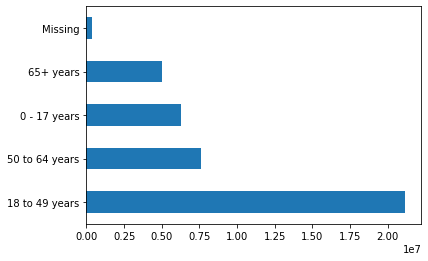

In [10]:
cdc['age_group'].value_counts().plot(kind='barh')

<AxesSubplot:>

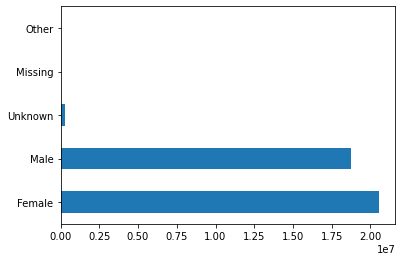

In [25]:

cdc['sex'].value_counts().plot(kind='barh')

In [26]:
cdc.columns

Index(['case_month', 'res_state', 'state_fips_code', 'res_county',
       'county_fips_code', 'age_group', 'sex', 'race', 'ethnicity',
       'case_positive_specimen_interval', 'case_onset_interval', 'process',
       'exposure_yn', 'current_status', 'symptom_status', 'hosp_yn', 'icu_yn',
       'death_yn', 'underlying_conditions_yn'],
      dtype='object')

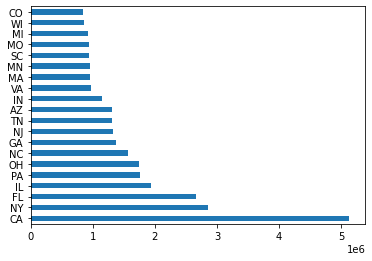

In [30]:
state = cdc['res_state'].value_counts()
top_20_states = state[:20].plot(kind='barh')

<AxesSubplot:xlabel='res_state', ylabel='Percent'>

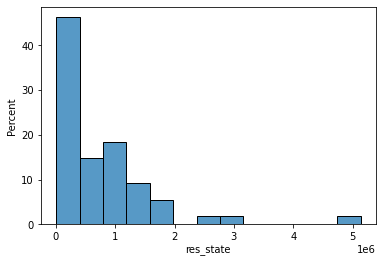

In [39]:
sns.histplot(state, stat='percent')

In [32]:
parsed_dates = pd.to_datetime(cdc['case_month'])

In [59]:
in2020 = cdc[parsed_dates.dt.year == 2020]

plotting = len(cdc[(parsed_dates.dt.month == 1) & (parsed_dates.dt.year == 2021)])
plotting

4503277

<AxesSubplot:xlabel='case_month', ylabel='Percent'>

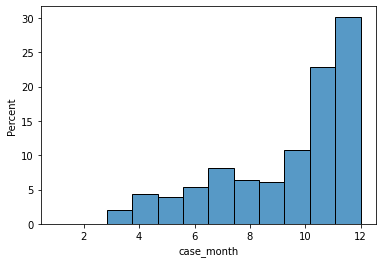

In [63]:
cdc_2020 = cdc.case_month[cdc.case_month.dt.year == 2020]
sns.histplot(cdc_2020.dt.month, stat='percent', bins=12)

In [ ]:
sns.histplot(cdc['case_month'][parsed_dates.dt.year ])

In [35]:
state

CA    5131301
NY    2851669
FL    2661985
IL    1938104
PA    1768480
OH    1745546
NC    1561915
GA    1373441
NJ    1319647
TN    1316943
AZ    1305892
IN    1155416
VA     975052
MA     959702
MN     952279
SC     939063
MO     932516
MI     919424
WI     860186
CO     842988
AL     835773
WA     788451
OK     666520
MD     662613
UT     604500
KY     548437
IA     503379
KS     484988
NV     434552
OR     400042
CT     389234
AR     377593
NM     326798
ID     310164
NE     246682
MT     193964
SD     184233
ND     166086
TX     155025
DE     152960
RI     151853
AK     146241
ME     120609
WY     112563
NH      95282
HI      68704
DC      67112
MS      55394
VT      49464
PR      44856
LA      20136
GU      17619
WV      10075
VI       6883
Name: res_state, dtype: int64

In [6]:
CATEGORICAL_COLUMNS = ['case_month','county_fips_code','state_fips_code','res_state', 'res_county','sex', 'race'
                      , 'age_group','ethnicity', 'process', 'current_status', 'symptom_status', 'hosp_yn', 'icu_yn', 'underlying_conditions_yn',
                      'exposure_yn']
NUMERICAL_COLUMNS = ['case_positive_specimen_interval','case_onset_interval']


feature_columns = []

for feature_name in CATEGORICAL_COLUMNS:
    vocabulary = train[feature_name].unique()
    feature_columns.append(tf.feature_column.categorical_column_with_vocabulary_list(feature_name, vocabulary))
    
for feature_name in NUMERICAL_COLUMNS:
    feature_columns.append(tf.feature_column.numeric_column(feature_name, dtype=tf.float32))
print(feature_columns)

[VocabularyListCategoricalColumn(key='case_month', vocabulary_list=('2021-01', '2020-04', '2020-08', '2021-09', '2020-09', '2020-11', '2021-08', '2020-10', '2021-04', '2020-05', '2021-12', '2021-03', '2021-11', '2021-10', '2020-07', '2020-12', '2021-06', '2021-07', '2021-02', '2020-06', '2020-03', '2021-05'), dtype=tf.string, default_value=-1, num_oov_buckets=0), VocabularyListCategoricalColumn(key='county_fips_code', vocabulary_list=('32003', '19193', '20037', '39081', '20045', '20057', '39113', '19155', '39107', '20175', '49005', '49039', '21067', '20113', '49047', '19183', '32007', '39165', '39147', '39061', '19187', '39077', '20015', '20161', '20103', '19181', '39155', '39173', '39069', '21035', '39039', '21195', '19149', '39079', '39097', '39131', '39023', '21199', '39141', '21231', '19127', '39045', '39041', '39175', '39001', '39033', '20009', '20149', '21217', '21019', '21151', '21193', '39161', '39031', '32031', '49041', '21013', '49011', '21107', '39151', '20173', '39095', '39

In [42]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 75000 entries, 1 to 75000
Data columns (total 18 columns):
 #   Column                           Non-Null Count  Dtype 
---  ------                           --------------  ----- 
 0   case_month                       75000 non-null  object
 1   res_state                        75000 non-null  object
 2   state_fips_code                  75000 non-null  object
 3   res_county                       75000 non-null  object
 4   county_fips_code                 75000 non-null  object
 5   age_group                        75000 non-null  object
 6   sex                              75000 non-null  object
 7   race                             75000 non-null  object
 8   ethnicity                        75000 non-null  object
 9   case_positive_specimen_interval  75000 non-null  object
 10  case_onset_interval              75000 non-null  object
 11  process                          75000 non-null  object
 12  exposure_yn                     

In [ ]:
tf.feature_column.

In [47]:
train['case_onset_interval'].unique()

array(['34.0', '0.0', '4.0', '1.0', '14.0', '12.0', '3.0', '13.0', '16.0',
       '15.0', '18.0', '11.0', '6.0', '2.0', '7.0', '8.0', '33.0', '35.0',
       '9.0', '10.0', '5.0', '27.0', '43.0', '21.0', '20.0', '40.0',
       '32.0', '38.0', '36.0', '30.0', '70.0', '44.0', '19.0', '46.0',
       '17.0', '28.0', '60.0', '72.0', '42.0', '23.0', '24.0', '47.0',
       '26.0', '37.0', '59.0', '22.0', '73.0', '29.0', '49.0', '25.0',
       '66.0', '57.0', '58.0', '75.0', '31.0', '71.0', '51.0', '39.0',
       '48.0', '54.0', 0.0, 4.0, 3.0, 2.0, 31.0, 1.0, 27.0, 14.0, 16.0,
       5.0, 12.0, 8.0, 10.0, 6.0, 7.0, 17.0, 15.0, 19.0, 18.0, 21.0, 54.0,
       35.0, 24.0, 23.0, 22.0, 26.0, 11.0, 74.0, 13.0, 9.0, 37.0, 20.0,
       36.0, 28.0, 32.0, 64.0, 39.0, 33.0], dtype=object)

In [19]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75000 entries, 0 to 74999
Data columns (total 18 columns):
 #   Column                           Non-Null Count  Dtype 
---  ------                           --------------  ----- 
 0   case_month                       75000 non-null  object
 1   res_state                        75000 non-null  object
 2   state_fips_code                  75000 non-null  object
 3   res_county                       75000 non-null  object
 4   county_fips_code                 75000 non-null  object
 5   age_group                        75000 non-null  object
 6   sex                              75000 non-null  object
 7   race                             75000 non-null  object
 8   ethnicity                        75000 non-null  object
 9   case_positive_specimen_interval  75000 non-null  int64 
 10  case_onset_interval              75000 non-null  int64 
 11  process                          75000 non-null  object
 12  exposure_yn                     

In [7]:
def make_input_fn(data_df, label_df, num_epochs=50, shuffle=True, batch_size=2048):
    def input_function(): # inner function, this will be returned
        ds = tf.data.Dataset.from_tensor_slices((dict(data_df), label_df)) # create tf.data.Dataset object with data and its labels
        if shuffle:
            ds = ds.shuffle(1000) # randomize order of data
        ds = ds.batch(batch_size).repeat(num_epochs) # split dataset into batches of 32 and repeat process for no. of epochs
        return ds
    return input_function # return a function object for use

train_input_fn = make_input_fn(train, y_train) # here we will call the input_function that was returned to us to get a dataset object we can fit into the model
eval_input_fn = make_input_fn(test, y_test, num_epochs=1, shuffle=False)


linear_est = tf.estimator.LinearClassifier(feature_columns=feature_columns)
linear_est.train(train_input_fn) # train
result = linear_est.evaluate(eval_input_fn) # get model metrics/stats by testing on testing data
clear_output()
print(result) # result variable is a dict of stats about our model

{'accuracy': 0.975816, 'accuracy_baseline': 0.97513956, 'auc': 0.93771726, 'auc_precision_recall': 0.36853826, 'average_loss': 0.07126899, 'label/mean': 0.024860477, 'loss': 0.07074658, 'precision': 0.55, 'prediction/mean': 0.017604591, 'recall': 0.14965986, 'global_step': 1850}


In [17]:
result = list(linear_est.predict(eval_input_fn)) # <-- this is a generator object 
clear_output()
print(result[3500])
print(y_test.loc[3500 + 75000])

{'logits': array([-6.618894], dtype=float32), 'logistic': array([0.00133313], dtype=float32), 'probabilities': array([0.9986669 , 0.00133313], dtype=float32), 'class_ids': array([0]), 'classes': array([b'0'], dtype=object), 'all_class_ids': array([0, 1], dtype=int32), 'all_classes': array([b'0', b'1'], dtype=object)}
0


In [26]:
train = train.astype({'county_fips_code' : str, 'state_fips_code':str, 'case_positive_specimen_interval':int,
                     'case_onset_interval':int},errors='ignore')
test = test.astype({'county_fips_code' : str, 'state_fips_code':str, 'case_positive_specimen_interval':int,
                   'case_onset_interval':int}, errors='ignore')
train.dtypes

# test = test.astype({'county_fips_code' : str, 'state_fips_code':str, 'case_positive_specimen_interval':int,
#                      'case_onset_interval':int, 'exposure_yn':int, 'hosp_yn':int, 'icu_yn': int, "underlying_conditions_yn":int})

case_month                          object
res_state                           object
state_fips_code                     object
res_county                          object
county_fips_code                    object
age_group                           object
sex                                 object
race                                object
ethnicity                           object
case_positive_specimen_interval    float64
case_onset_interval                float64
process                             object
exposure_yn                         object
current_status                      object
symptom_status                      object
hosp_yn                             object
icu_yn                              object
underlying_conditions_yn            object
dtype: object

In [70]:
cdc['underlying_conditions_yn'].unique()

array([1., 0.])

In [66]:
train['underlying_conditions_yn'].value_counts()

Yes    481755
No      18245
Name: underlying_conditions_yn, dtype: int64